Observable Trends:

- Based on the recent tweet data, there appear to be many more negative sentiments from Fox News than other media outlets in the dataset. Sentiments for this media outlet range much closer to the -1 maximum value than others.
- CNN, CBS, and The New York Times have more instances of positive sentiments than the rest of the media outlets in the dataset; higher instances of compound values over 0.75.
- CNN and CBS News have a seemingly even distribution of types of sentiments in tweets, neither news outlet heavily skews positive or negative. This data shows that CNN has a slightly more positive compound sentiment value than CBS News. 



In [14]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# get tweets
# twitter accounts
target_users = ["@CNN", "@nytimes", "@FoxNews", "@BBCNews", "@CBSNews"]

sentiment_data = []

for target_user in target_users:

    counter = 1
    
    for x in range(5):
    
        public_tweets = api.user_timeline(target_user)

        for tweet in public_tweets:
        
            #print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
            #break
    
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet['text'])["pos"]
            neu = analyzer.polarity_scores(tweet['text'])["neu"]
            neg = analyzer.polarity_scores(tweet['text'])["neg"]
            tweets_ago = counter
        
                # Add sentiments for each tweet into an array
            sentiment_data.append({"Account Name": tweet['user']['name'],
                                "Date": tweet['created_at'],
                                "Tweet Text": tweet['text'],             
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neu,
                                "Neutral": neg,
                                "Tweets Ago": counter})
        
                # Add to counter 
            counter = counter + 1

In [3]:
sentiments_df = pd.DataFrame.from_dict(sentiment_data)
sentiments_df.head()

,Account Name,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago
0,CNN,0.7772,Mon Mar 19 23:21:23 +0000 2018,0.715,0.000,0.285,RT @TheLeadCNN: We're celebrating 5 years of #...,1
1,CNN,0.2500,Mon Mar 19 23:20:00 +0000 2018,0.905,0.000,0.095,Trump lawyer Michael Cohen jokes about Stormy ...,2
2,CNN,0.0000,Mon Mar 19 23:10:06 +0000 2018,1.000,0.000,0.000,"With just days before a potential shutdown, ne...",3
3,CNN,-0.4019,Mon Mar 19 23:07:04 +0000 2018,0.816,0.184,0.000,"An anti-abortion, conservative Democrat fights...",4
4,CNN,0.0000,Mon Mar 19 23:01:07 +0000 2018,1.000,0.000,0.000,What you need to know about Facebook's data de...,5


In [6]:
sentiments_df = sentiments_df[["Account Name", "Date", "Tweet Text", "Compound", "Positive",
                               "Negative", "Neutral", "Tweets Ago"]]

sentiments_df.head()

,Account Name,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,CNN,Mon Mar 19 23:21:23 +0000 2018,RT @TheLeadCNN: We're celebrating 5 years of #...,0.7772,0.285,0.715,0.000,1
1,CNN,Mon Mar 19 23:20:00 +0000 2018,Trump lawyer Michael Cohen jokes about Stormy ...,0.2500,0.095,0.905,0.000,2
2,CNN,Mon Mar 19 23:10:06 +0000 2018,"With just days before a potential shutdown, ne...",0.0000,0.000,1.000,0.000,3
3,CNN,Mon Mar 19 23:07:04 +0000 2018,"An anti-abortion, conservative Democrat fights...",-0.4019,0.000,0.816,0.184,4
4,CNN,Mon Mar 19 23:01:07 +0000 2018,What you need to know about Facebook's data de...,0.0000,0.000,1.000,0.000,5


In [10]:
sentiments_df.to_csv("media_sentiment_data.csv", encoding="utf-8", index=False)

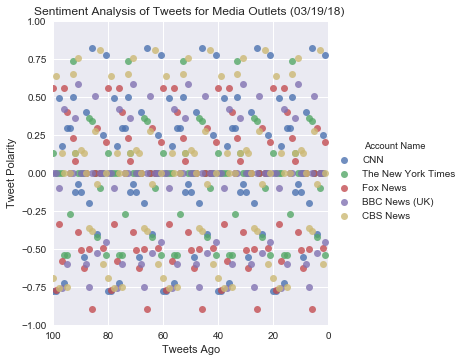

In [48]:
sns.set()
sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df, hue='Account Name', fit_reg=False)

plt.title("Sentiment Analysis of Tweets for Media Outlets (%s) %s" % (time.strftime("%x"), ""))

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.grid(True)
plt.xlim([100, 0])
plt.ylim([-1, 1])

plt.savefig("Sentiment_Analysis_Tweets.png", dpi=150)

plt.show()

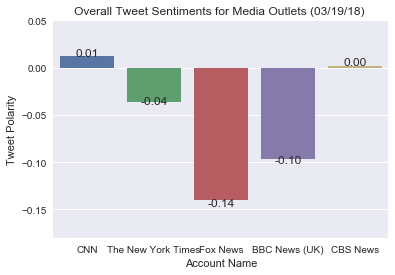

In [67]:
sns.set()
ax = sns.barplot(x='Account Name', y='Compound', data=sentiments_df, ci=None)

plt.title("Overall Tweet Sentiments for Media Outlets (%s) %s" % (time.strftime("%x"), ""))
plt.ylabel("Tweet Polarity")


plt.ylim(-0.18, 0.05)

#get labels for bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            1.05*height,
                '{:1.2f}'.format(height),
            ha="center") 

plt.savefig("Media_Sentiment_Overall.png", dpi=150)
plt.show()